In [1]:
from RF_feature_selection import *
RANDOM_SEED = 137
test_fraction = 0.2
print('Loading and EDA')
df,target,df_info = EDA('train.csv',data_fraction=0.2)

param_grid = grid_param_setup()
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size= test_fraction, random_state=RANDOM_SEED)
base_model = RandomForestRegressor(random_state = RANDOM_SEED)
rf_random = random_grid(X_train,y_train,base_model,param_grid,RANDOM_SEED)

Loading and EDA
version 1


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


param_grid:
{'bootstrap': [True, False],
 'max_depth': [10, 60, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [0, 22, 44, 66, 88, 111, 133, 155, 177, 200]}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [9]:
rf_random.best_params_

{'n_estimators': 66,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [10]:
params_ = {'bootstrap': [True, False],
 'max_depth': [50, 60, 70, None],
 'max_features': ['sqrt'],
 'min_samples_leaf': [2],
 'min_samples_split': [2],
 'n_estimators': [int(x) for x in np.linspace(40, 90, 10)]}

rf_grid = search_grid(X_train,y_train,base_model,params_) 

#compare_result(rf_random,rf_grid,base_model,X_train, X_test, y_train, y_test)


Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   29.6s finished


In [11]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 78}

In [14]:
best_params_ = {'bootstrap': False,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 78}
 
rf_best = RandomForestRegressor(bootstrap = False, max_depth = 70, max_features = 'sqrt', 
                                min_samples_leaf = 2, min_samples_split = 2, 
                                n_estimators = 78,
                                n_jobs = -1, random_state = RANDOM_SEED)
rf_best.fit(X_train,y_train)
evaluate(rf_best, X_test, y_test)
features = feature_sel(rf_best,X_train,y_train)

Model Performance
R2 Score: 0.22% degrees.
RMSE = 7148726.4892
Index(['20aa07010', 'bd8f989f1', '22ed6dba3', '87ffda550', '822e49b95',
       '80b14398e', '654dd8a3b', '64534cc93', '963a49cdc', 'a75d400b8',
       ...
       'c47340d97', '2cb73ede7', 'adf357c9b', 'e79e5f72c', '19915a6d3',
       'ef30f6be5', '23310aa6f', 'b1bb8eac3', '9437d8b64', '5831f4c76'],
      dtype='object', length=270)


In [15]:
tree_grid = {'n_estimators': [int(x) for x in np.linspace(1, 150, 20)]}

# Create the grid search model and fit to the training data
tree_grid_search = GridSearchCV(rf_best, param_grid=tree_grid, verbose = 2, n_jobs=-1, cv = 5,
                                    scoring = 'neg_mean_absolute_error',return_train_score=True)
tree_grid_search.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.7s finished
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


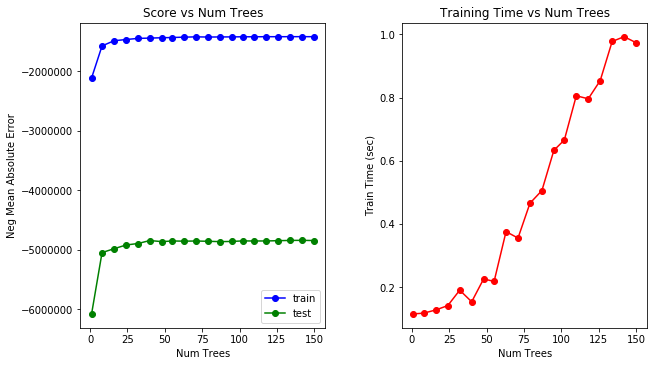

In [16]:
plot_results(tree_grid_search)

In [24]:
best_params_ = {'bootstrap': False,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 10}
 
rf_best = RandomForestRegressor(bootstrap = True, max_depth = 70, max_features = 'sqrt', 
                                min_samples_leaf = 2, min_samples_split = 2, 
                                n_estimators = 20,
                                n_jobs = -1, random_state = RANDOM_SEED)
rf_best.fit(X_train,y_train)
evaluate(rf_best, X_test, y_test)
features = feature_sel(rf_best,X_train,y_train)

Model Performance
R2 Score: 0.20% degrees.
RMSE = 7206929.8787
Index(['20aa07010', '4681de4fd', 'bd8f989f1', '22ed6dba3', '963a49cdc',
       '59dfc16da', '4b6c549b1', 'a75d400b8', '68a945b18', '63c094ba4',
       ...
       'ea26c7fe6', '46c525541', 'e79e5f72c', 'a396ceeb9', 'a3382e205',
       '8d7bfb911', '05f11f48f', 'e431708ff', '23310aa6f', '9437d8b64'],
      dtype='object', length=250)


In [26]:
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score
from collections import defaultdict


In [68]:
import warnings
warnings.filterwarnings('ignore')
scores = defaultdict(list)
rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
for train_idx, test_idx in rs.split(df):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = df.iloc[train_idx,:], df.iloc[test_idx,:]
    Y_train, Y_test = target.iloc[train_idx], target.iloc[test_idx]
    r = rf_best.fit(X_train, Y_train)
    acc = r2_score(Y_test, rf_best.predict(X_test))
    for col in df:
        X_t = X_test.copy()
        np.random.shuffle(X_t.loc[:,col])
        shuff_acc = r2_score(Y_test, rf_best.predict(X_t))
        scores[col].append((acc-shuff_acc)/acc)
print ("Features sorted by their score:")
sorted_scores= sorted([(round(np.mean(score), 4), feat) for
              feat, score in scores.items()], reverse=True)
sorted_scores

Features sorted by their score:


[(0.0924, '6eef030c1'),
 (0.0741, 'dfd179071'),
 (0.0657, 'f190486d6'),
 (0.064, '402b0d650'),
 (0.053, 'b85fa8b27'),
 (0.0474, 'ce3d7595b'),
 (0.0458, 'e176a204a'),
 (0.0435, '041c5d0c9'),
 (0.0428, 'd5fa73ead'),
 (0.0402, '5c6487af1'),
 (0.0363, '58e2e02e6'),
 (0.0344, '1db387535'),
 (0.0337, '46c525541'),
 (0.0307, 'c47340d97'),
 (0.0304, 'ea4046b8d'),
 (0.03, 'edc84139a'),
 (0.0281, '474a9ec54'),
 (0.027, '9fd594eec'),
 (0.0262, 'ad009c8b9'),
 (0.0219, '241f0f867'),
 (0.0217, '82e01a220'),
 (0.0217, '5f341a818'),
 (0.0216, 'fb0f5dbfe'),
 (0.0213, 'f514fdb2e'),
 (0.0204, '580f5ff06'),
 (0.0186, 'f6eba969e'),
 (0.0185, '87a2d8324'),
 (0.0183, '190db8488'),
 (0.018, 'c928b4b74'),
 (0.018, '4bcf15776'),
 (0.0179, '9280f3d04'),
 (0.0169, 'bee629024'),
 (0.0166, '22ed6dba3'),
 (0.0161, '1702b5bf0'),
 (0.0152, '74d7f2dc3'),
 (0.0151, '08e89cc54'),
 (0.0149, 'ea772e115'),
 (0.0145, 'fc436be29'),
 (0.0143, 'adb64ff71'),
 (0.0143, '04dc93c58'),
 (0.014, '57dd44c29'),
 (0.0139, '2fc60d4d9'),


In [69]:
np.random.shuffle(X_t.loc[col])

KeyError: '8675bec0b'

In [67]:
X_t.loc['0b8e10df6']

KeyError: '0b8e10df6'